#1a Alternativa. Comportamiento periódico del DPDist

En este notebook corremos el DPDist con distintos modelos y a distintos ángulos de rotación, esto lo hacemos para ver el comportamiento del mismo y ver que tan probable es entrenar una red neuronal con estos resultados

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes')
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

Cargamos todos los resultados de los modelos a comparar, todos tienen el mismo orden de ángulos respectivamente

In [ ]:
dpdistAirplane02 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_airplane_0002_0.txt')
dpdistAirplane04 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_airplane_0004_0.txt')
dpdistRadio01 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_radio_0001_0.txt')
dpdistRadio02 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_radio_0002_0.txt')
dpdistTable03 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_table_0003_0.txt')
dpdistTable08 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_table_0008_0.txt')
dpdistToilet01 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_toilet_0001_0.txt')
dpdistToilet16 = np.loadtxt('./resultadosDPDist/grupoModelos/DPDist_distancias1000-modelo_rotado_toilet_0016_0.txt')

angulos = np.loadtxt('./resultadosDPDist/grupoModelos/angulos1000-modelo_rotado_0.txt', delimiter=',', usecols=(0,1,2))

#angulosRotados = np.loadtxt('./resultadosDPDist/angulos_modelo_rotado1.txt', delimiter=',', usecols=(0,1,2))
#distanciasModo1 = np.loadtxt('./resultadosDPDist/DPDist_distancias2.txt')
#distanciasModo2 = np.loadtxt('./resultadosDPDist/DPDist_distancias1000_0.txt')

##Gráfica del comportamiento del DPDist

Imprimimos el resultado del DPDist para cada modelo tomado

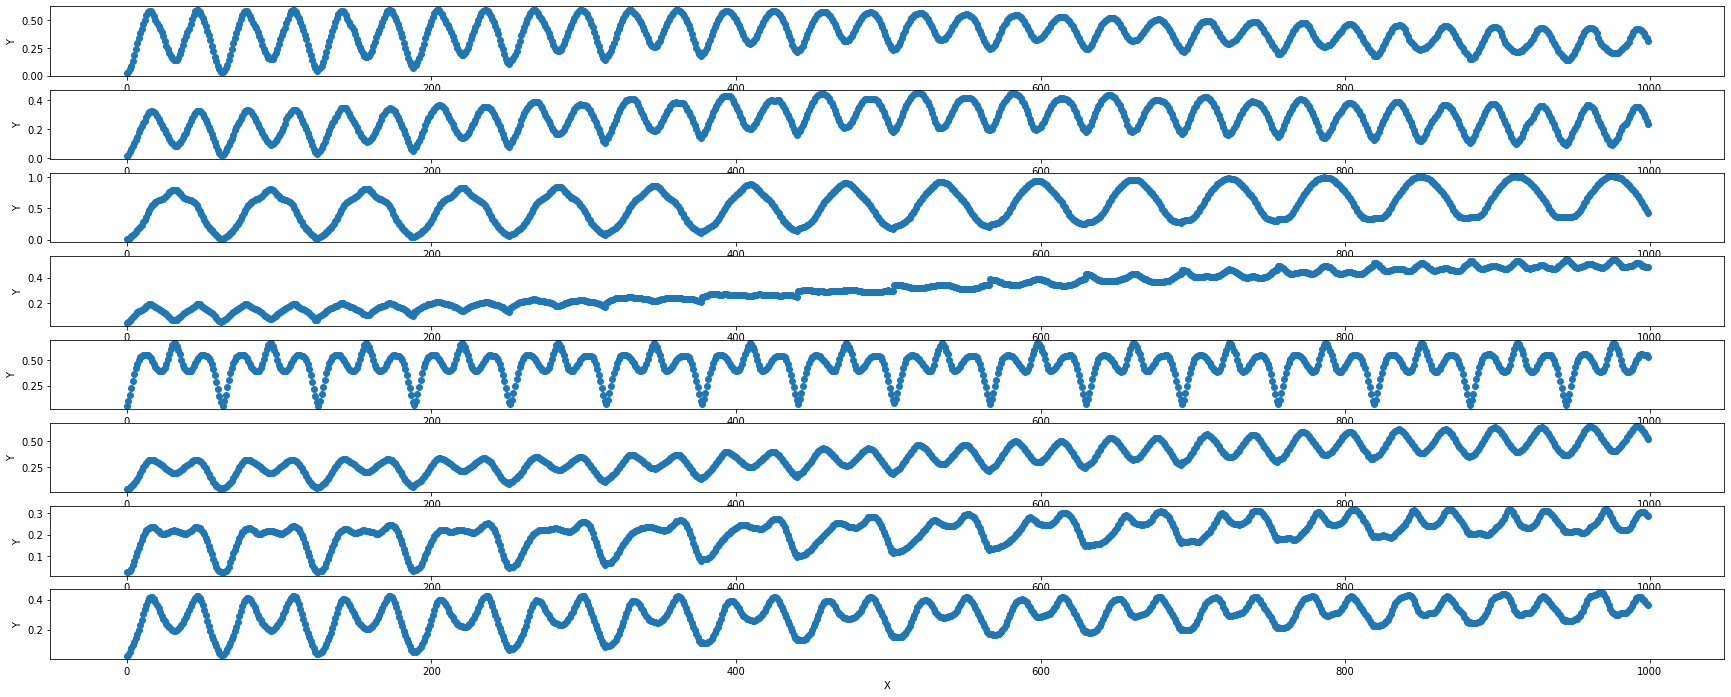

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(8, 1, 1)
Y = dpdistAirplane02
X = range(1000)

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 2)
Y = dpdistAirplane04

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 3)
Y = dpdistRadio01

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 4)
Y = dpdistRadio02

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 5)
Y = dpdistTable03

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 6)
Y = dpdistTable08

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 7)
Y = dpdistToilet01

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(8, 1, 8)
Y = dpdistToilet16

ax.scatter(X,Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')


plt.show()

##Datos de entrenamiento y testeo

Concatenamos los datos del DPDist en un solo conjunto X para el entrenamiento y testeo de la red neuronal que implementaremos más adelante_

In [ ]:
print(dpdistAirplane02.shape)
X = np.concatenate([dpdistAirplane02,dpdistAirplane04,dpdistRadio01,dpdistRadio02,dpdistTable03,dpdistTable08,dpdistToilet01,dpdistToilet16])
print(X.shape)

(1000,)
(8000,)


Concatenamos la misma cantidad de veces el conjunto de etiquetas (ángulos), para relacionarla con el conjunto X de entrenamiento creado anteriormente

In [ ]:
Y = np.concatenate([angulos,angulos,angulos,angulos,angulos,angulos,angulos,angulos])
print(Y.shape)

(8000, 3)


Comprobamos que en el conjunto X no hayan datos repetidos

In [ ]:
for i in range(len(X)):
  for j in range(len(X)):
    if (i != j):
      if (X[i] == X[j]):
        print("Hay dos datos iguales: " , X[i] , " en la posición ", i ," y ", j)
        break

In [ ]:
print(Y[1453])
print(Y[5458])

[0.  0.7 1.2]
[0.  0.7 1.7]


In [ ]:
X[1453]=0.4293907582759856

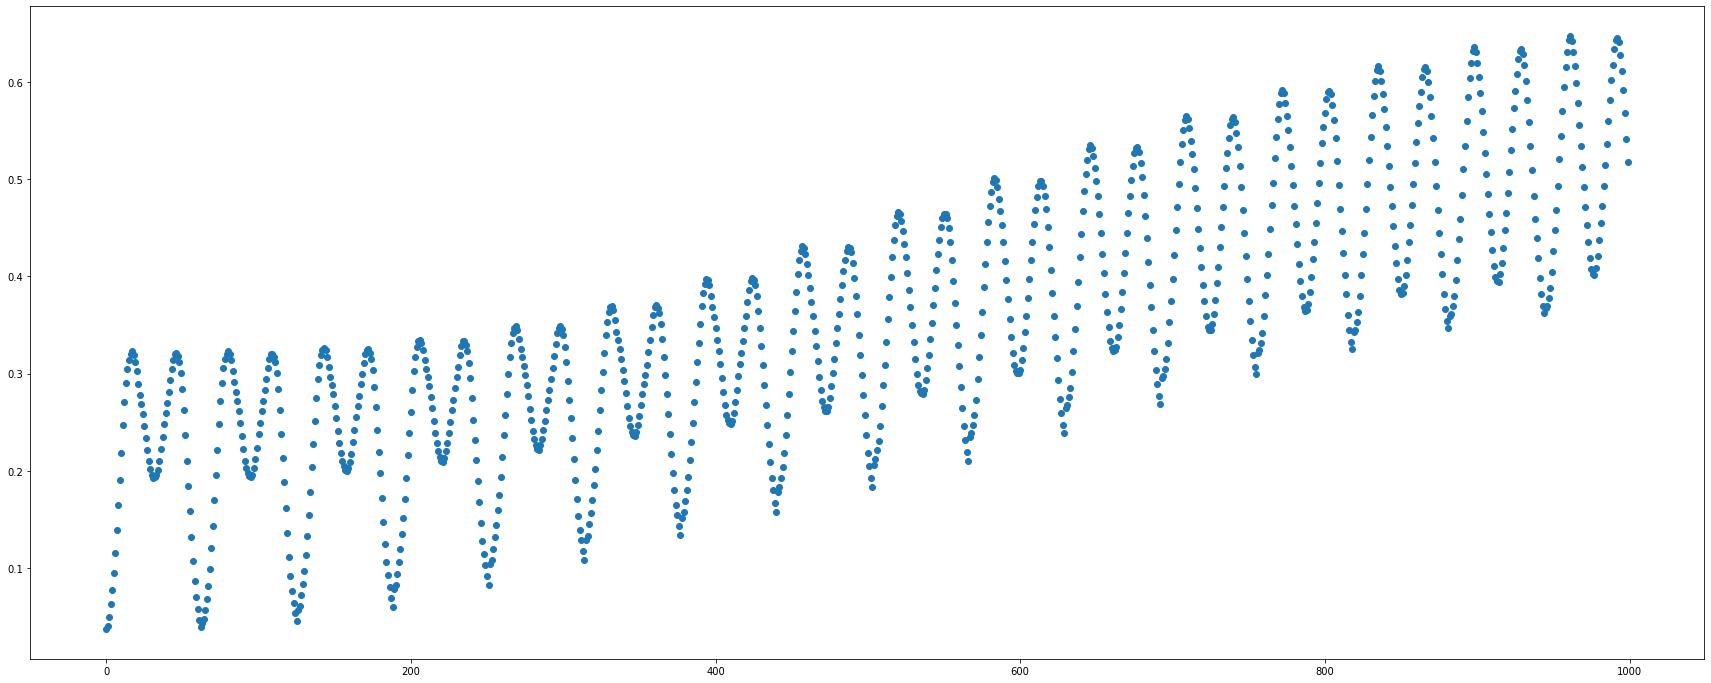

In [ ]:
fig = plt.figure(figsize=(30,12))
plt.scatter(range(1000),distanciasModo2,label='pred')
plt.show()

##Red Neuronal

Definimos una red neuronal para tratar de predecir los águlos asociados a cada valor DPDist dado, entre distintos tipos de nubes de puntos

Definimos un 80% de los datos para entrenamiento y un 20% restante para testeo

In [ ]:
#Separacion de datos de entrenamiento y test mediante la funcion split, con 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train = X_train.astype('float32')/np.max(X_train)
X_test = X_test.astype('float32')/ np.max(X_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Estructura de la red neuronal planteada

In [ ]:
model =  tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                             tf.keras.layers.Dense(1024, activation='tanh'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(512, activation='tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation='tanh'),
                             tf.keras.layers.Dense(3)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1024)              2048      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 3)                 7

Entrenamiento planteado para 300 épocas

In [ ]:
opt = tf.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=opt, loss='mse')
hist= model.fit(X_train, y_train, epochs=300, batch_size=18, validation_data=(X_test, y_test))

Epoch 1/300
356/356 [==============================] - 4s 9ms/step - loss: 1.2338 - val_loss: 1.1646
Epoch 2/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1674 - val_loss: 1.1692
Epoch 3/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1657 - val_loss: 1.1629
Epoch 4/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1622 - val_loss: 1.1629
Epoch 5/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1618 - val_loss: 1.1626
Epoch 6/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1605 - val_loss: 1.1586
Epoch 7/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1643 - val_loss: 1.1587
Epoch 8/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1599 - val_loss: 1.1728
Epoch 9/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1582 - val_loss: 1.1617
Epoch 10/300
356/356 [==============================] - 3s 9ms/step - loss: 1.1592 - val_lo

Gráfica del resultado de la pérdida en las fases de entrenamiento y testeo

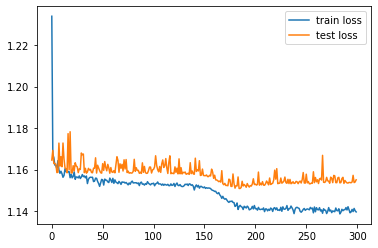

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train loss');
plt.plot(hist.history['val_loss'], label='test loss');
plt.legend()
plt.show();

Comparación de dimensiones entre las predicciones de la red y las etiquetas (Ground Truth), con las que iremos a comparar

In [ ]:
predictions = model.predict(X_test)
predictions.shape
#print(X_test[0][..., np.newaxis].T)
#print(X_test[:1])

(1600, 3)

In [ ]:
y_test.shape

(1600, 3)

Comparación Predicciones vs Ground Truth para los ángulos de los ejes X,Y y Z

(1600, 3)


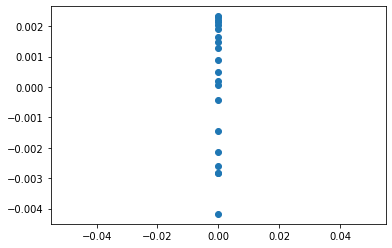

In [ ]:
#rotaciones en X predichas vs reales
print(predictions.shape)
plt.scatter(y_test[0:20,0],predictions[0:20,0],label='pred')
plt.show()

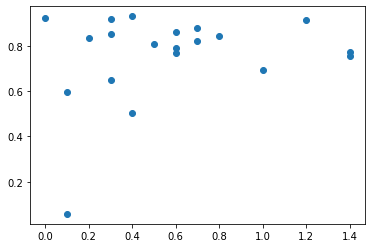

In [ ]:
#rotaciones en Y predichas vs reales
plt.scatter(y_test[0:20,1],predictions[0:20,1],label='pred')
plt.show()

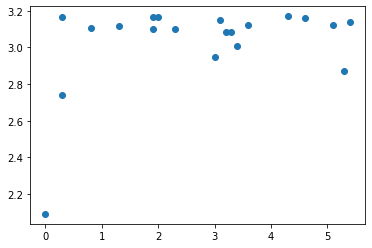

In [ ]:
#rotaciones en Z predichas vs reales
plt.scatter(y_test[0:20,2],predictions[0:20,2],label='pred')
plt.show()

In [ ]:
angulosRotados[95:100]

array([[0. , 0.1, 3.2],
       [0. , 0.1, 3.3],
       [0. , 0.1, 3.4],
       [0. , 0.1, 3.5],
       [0. , 0.1, 3.6]])

In [ ]:
model.predict([0.20565266907215118])

array([[0.00470395, 0.17220034, 2.9754496 ]], dtype=float32)

##Conclusiones

No se obtuvieron buenos resultados, la diferencia entre los valores predichos y reales son significativass y en el caso de las predicciones en X fueron todas 0